# **I. INTRODUCTION**

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *Milestone 1* yang dibuat oleh **Asta Zeska Dimitri** dari Batch **001-HCK**.

## I.1. The Data

Untuk dataset yang digunakan pada analisis kali ini adalah data 'Telco Customer Churn' yang bisa didapatkan dari platform kaggle.com. Berikut adalah link ke dataset yang digunakan: `https://www.kaggle.com/datasets/blastchar/telco-customer-churn`.

Untuk memudahkan proses analisis kali ini, dilampirkan juga keterangan dari masing-masing kolom pada tabel agar lebih mudah dalam memahami isi dan maksud dari data tersebut.
Source: `https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113`

|Variable|Type|Description|Values|
|:-------|:------|:----------|:------|
|customerID|Object|A unique ID that identifies each customer|Unique|
|gender|Categorical|The customer’s gender|Male, Female|
|SeniorCitizen|Boolean|Indicates if the customer is 65 or older|1 : Yes, 0 : No|
|Partner|Categorical|Indicates if the customer has partner or not|Yes, No|
|Dependents|Categorical|Indicates if the customer lives with any dependents|Yes, No|
|tenure|Integer|Indicates the total amount of months that the customer has been with the company|Months|
|PhoneService|Categorical|Indicates if the customer subscribes to home phone service with the company|Yes, No|
|MultipleLines|Categorical|Indicates if the customer subscribes to multiple telephone lines with the company|Yes, No, No phone service|
|InternetService|Categorical|Indicates if the customer subscribes to Internet service with the company|DSL, Fiber optic, No|
|OnlineSecurity|Categorical|Indicates if the customer subscribes to an additional online security service provided by the company|Yes, No, No internet service|
|OnlineBackup|Categorical|Indicates if the customer subscribes to an additional online backup service provided by the company|Yes, No, No internet service|
|DeviceProtection|Categorical|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment|Yes, No, No internet service|
|TechSupport|Categorical|Indicates if the customer subscribes to an additional technical support plan|Yes, No, No internet service|
|StreamingTV|Categorical|Indicates if the customer uses their Internet service to stream television programing from a third party provider|Yes, No, No internet service|
|StreamingMovies|Categorical|Indicates if the customer uses their Internet service to stream movies from a third party provider|Yes, No, No internet service|
|Contract|Categorical|Indicates the customer’s current contract type|Month-to-month, One year, Two year|
|PaperlessBilling|Categorical|Indicates if the customer has chosen paperless billing|Yes, No|
|PaymentMethod|Categorical|Indicates how the customer pays their bill|Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)|
|MonthlyCharges|Float|Indicates the customer’s current total monthly charge for all their services from the company|USD|
|TotalCharges|Float|Indicates the customer’s total charges|USD|
|Churn|Categorical|Indicates the status of the customer at the end of the quarter|Yes, No|

## I.2. The Objective

Churn adalah sebuah istilah untuk customer yang berhenti menggunakan produk atau layanan perusahaan. Disini perusahaan ingin memprediksi customer yang kemungkinan akan melakukan churn pada quarter selanjutnya. Harapannya dengan mengetahui customer mana yang akan churn maka perusahaan bisa bersiap dengan membuat program khusus untuk mempertahankan customer tersebut. Prediksi dilakukan dengan menggunakan metode *Artificial Neural Network (ANN)*.

# **II. IMPORT LIBRARIES**

Memasukkan semua library yang akan digunakan dalam pengolahan data kali ini.

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler

np.random.seed(39)
tf.random.set_seed(39)

# **III. DATA LOADING AND OVERVIEW**

Memasukkan data yang akan digunakan dalam pengerjaan analisis kali ini sekaligus melakukan sedikit overview mengenai data yang digunakan.

In [55]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data yang digunakan terdiri dari 21 kolom dan 7043 baris. Dari pengamatan sekilas terhadap data dan berdasarkan keterangan kolomnya, kolom SeniorCitizen termasuk kolom kategorikal dengan value 1 dan 0. Kemudian untuk kolom TotalCharges karena data type-nya masih object maka penulis akan mengubahnya menjadi float karena valuenya sama dengan MonthlyCharges. Penulis juga akan menghapus kolom customerID karena merupakan identifier yang dimana valuenya unik, kolom ini tidak akan membantu dalam proses training ANN nantinya.

In [59]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(str)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [60]:
df.drop(columns='customerID', inplace=True)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Dilihat dari statistik deskriptifnya, menurut penulis tidak ditemukan adanya nilai yang sangat ekstrim pada data ini. Hal ini tentu masih harus dibuktikan lagi nanti pada saat handling outliers di data preprocessing. Dan dari jumlah datanya sepertinya ada missing value pada kolom TotalCharges.

In [62]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ditemukan adanya 11 missing value pada kolom TotalCharges atau sekitar 0.15% dari total data yang kita punya. Karena jumlah missing value yang sangat kecil yaitu kurang dari 1% maka penulis memutuskan untuk menghapus baris dengan missing value ini.

In [63]:
df.dropna(inplace=True)
df.reset_index()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# **IV. EXPLORATORY DATA ANALYSIS**

Pada section ini kita akan mencoba melakukan eksplorasi pada data yang digunakan dengan harapan ada informasi/insight yang akan membantu dalam proses analisis selanjutnya.

## IV.1. Churn (Target)

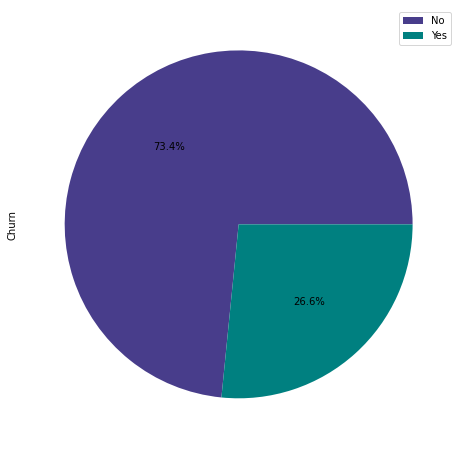

In [64]:
plt.figure(figsize=(8,8), facecolor='white')
df['Churn'].value_counts().plot(kind='pie', labels = ['',''], autopct='%1.1f%%', colors = ['darkslateblue','teal']);
plt.legend(labels=['No', 'Yes']);


Dari grafik di atas diketahui bahwa proporsi kolom target (Churn) kita kali ini adalah No sebesar 73.4% dan Yes sebesar 26.6%. Karena proporsi data yang tidak seimbang maka nantinya akan dilakukan handling imbalance agar lebih mengoptimalkan model dalam proses training data minoritas.

## IV.2. Categorical Features

In [65]:
df_copy = df.copy()
df_copy.loc[:, 'Churn'] = df_copy.loc[:, 'Churn'].replace('No', 0)
df_copy.loc[:, 'Churn'] = df_copy.loc[:, 'Churn'].replace('Yes', 1)

In [66]:
def bar(features):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_copy, x=features, y='Churn', palette='mako', ci=None)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.title('Feature Relation to Target')
    plt.ylabel('% of Churn')

In [67]:
feat_cat = df_copy.drop(columns=['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'])

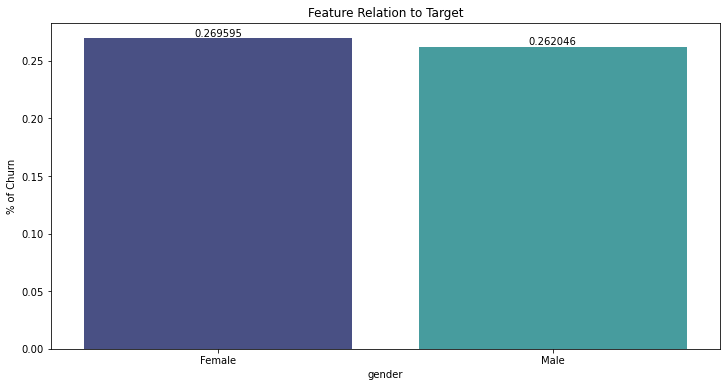

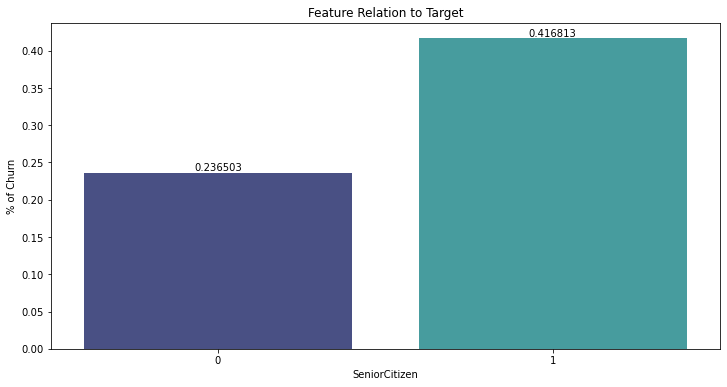

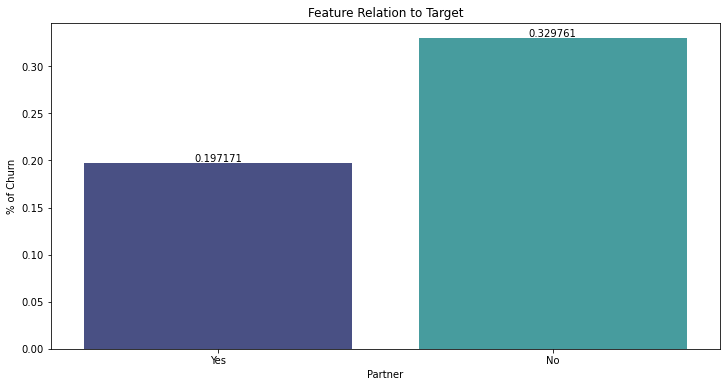

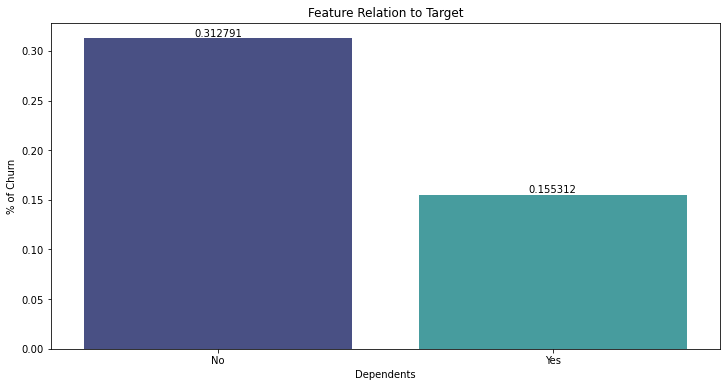

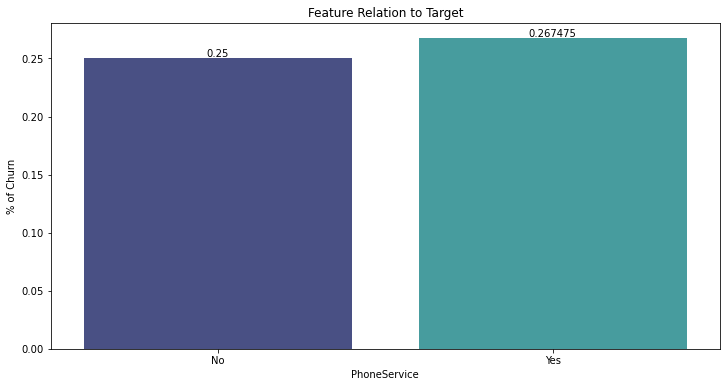

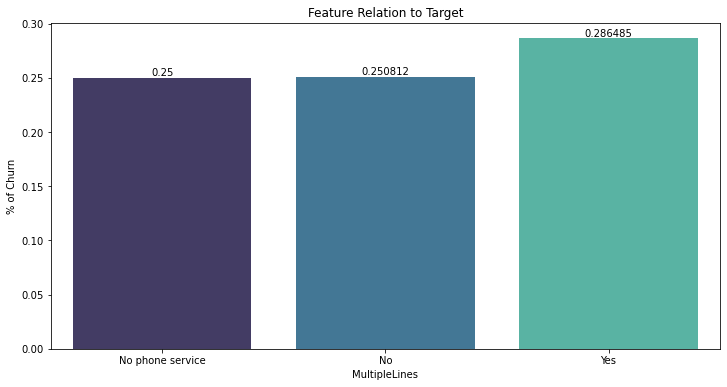

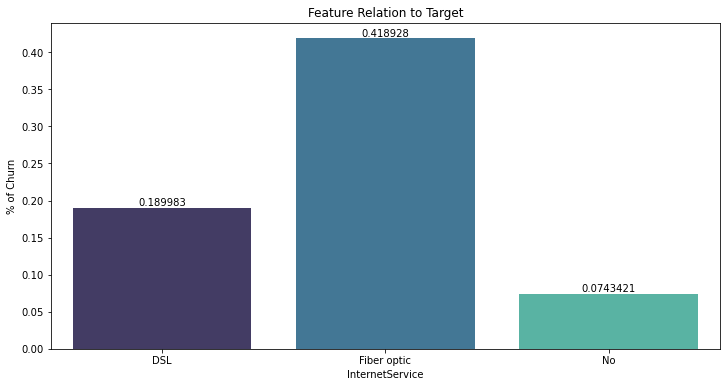

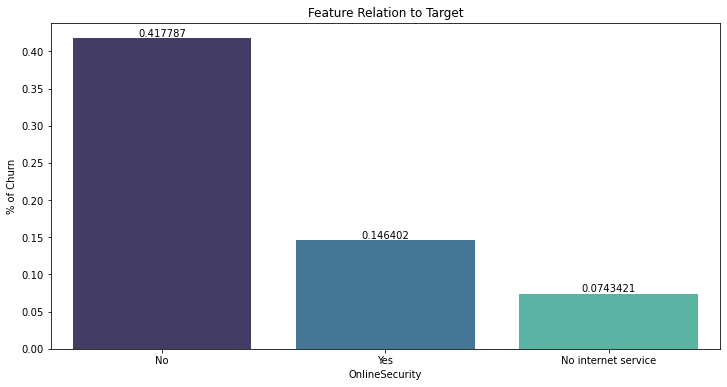

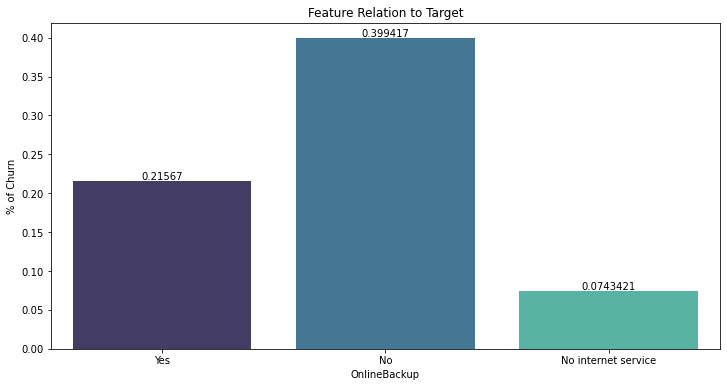

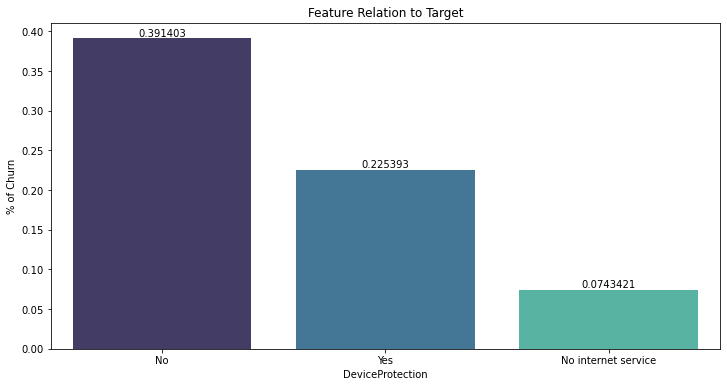

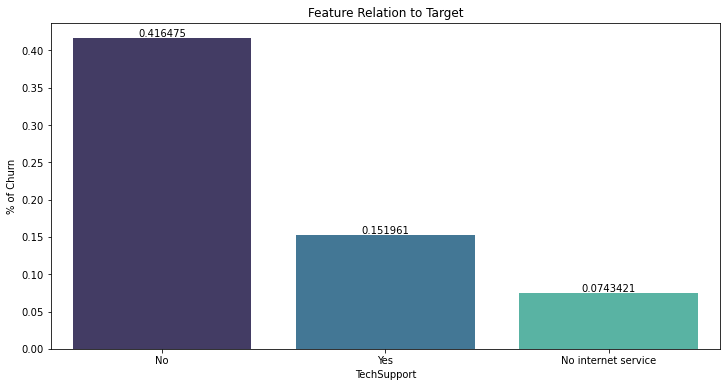

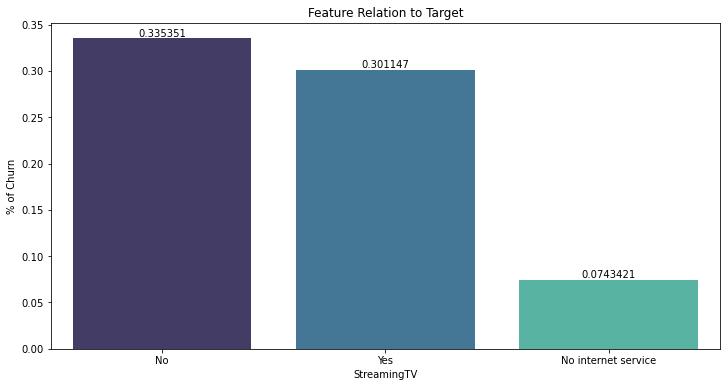

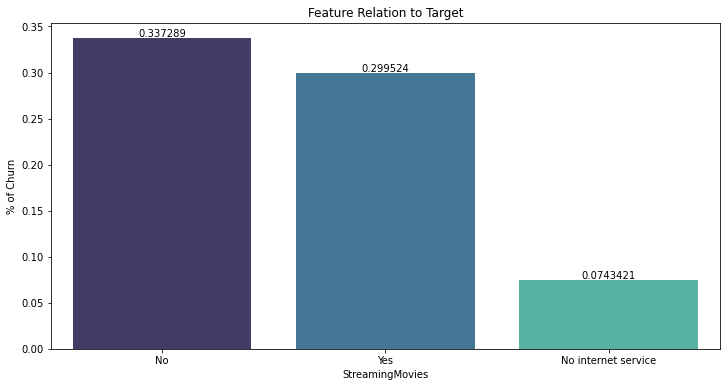

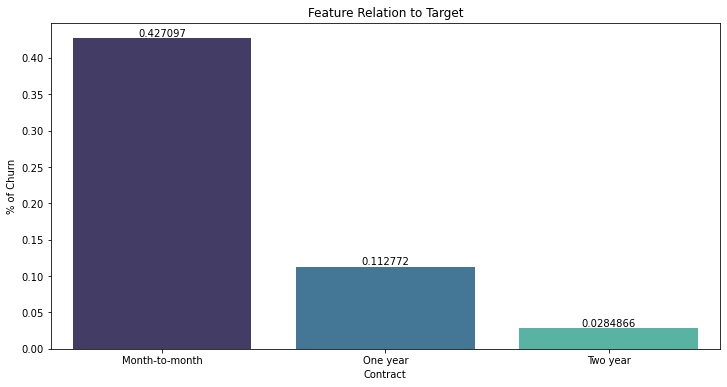

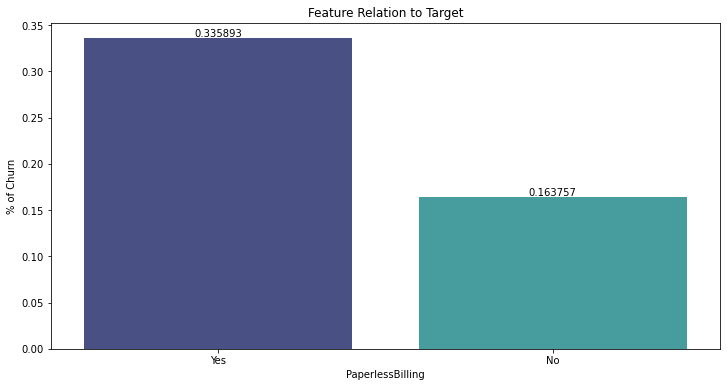

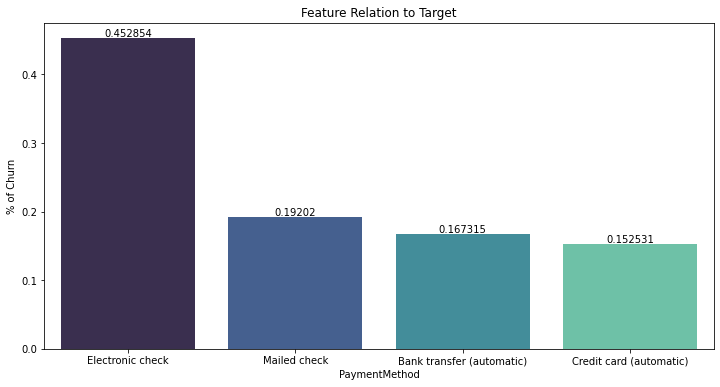

In [15]:
for features in feat_cat:
    bar(features)

Dari beberapa grafik diatas, kita bisa mendapatkan beberapa informasi mengenai kebiasaan atau karakteristik dari customer yang dimiliki. Beberapa informasinya adalah sebagai berikut:
- Jenis kelamin customer tidak mempengaruhi kecenderungan customer untuk churn, baik laki-laki dan perempuan memiliki kecenderungan yang sama.
- Customer dengan usia di atas 65 tahun atau yang termasuk golongan senior citizen lebih cenderung untuk melakukan churn.
- Customer yang belum menikah atau tidak memiliki partner lebih besar kemungkinannya untuk churn.
- Customer yang belum memiliki tanggungan memiliki kecenderungan lebih besar untuk melakukan churn.
- Customer yang memiliki multiple lines lebih cenderung untuk melakukan churn.
- Customer yang menggunakan layanan internet dengan fiber optic kemungkinan untuk churn lebih tinggi dibandingkan dengan yang lain.
- Customer yang tidak menggunakan layanan tambahan seperti online security, online backup, device protection dan tech support memiliki kecenderungan churn yang lebih tinggi.
- Customer yang tidak menggunakan produk kita untuk streaming TV atau Film lebih cenderung untuk melakukan churn.
- Customer dengan kontrak per bulan lebih besar kemungkinannya untuk churn dibandingkan dengan customer dengan kontrak per tahun.
- Customer yang memilih paperless billing lebih cenderung untuk melakukan churn.
- Customer yang menggunakan electronic check untuk pembayarannya juga lebih tinggi kemungkinannya untuk melakukan churn.

## IV.3. Numerical Feature

In [16]:
df_copy['tenure_range'] = pd.cut(df_copy['tenure'], [0, 10, 20, 30, 40, 50, 60, 70, 80])
df_copy['tenure_range'].value_counts()

(0, 10]     1959
(10, 20]     908
(60, 70]     875
(20, 30]     763
(50, 60]     698
(40, 50]     652
(30, 40]     645
(70, 80]     532
Name: tenure_range, dtype: int64

In [17]:
df_copy['monthly_range'] = pd.cut(df_copy['MonthlyCharges'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
df_copy['monthly_range'].value_counts()

(20, 30]      994
(80, 90]      926
(70, 80]      916
(90, 100]     837
(100, 110]    687
(10, 20]      653
(50, 60]      617
(60, 70]      541
(40, 50]      461
(110, 120]    215
(30, 40]      185
Name: monthly_range, dtype: int64

In [18]:
df_copy['total_range'] = pd.cut(df_copy['TotalCharges'], [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
df_copy['total_range'].value_counts()

(0, 1000]       2893
(1000, 2000]    1283
(2000, 3000]     652
(3000, 4000]     556
(4000, 5000]     513
(5000, 6000]     443
(6000, 7000]     365
(7000, 8000]     249
(8000, 9000]      78
Name: total_range, dtype: int64

In [19]:
feat_num = df_copy[['tenure_range', 'monthly_range', 'total_range']]

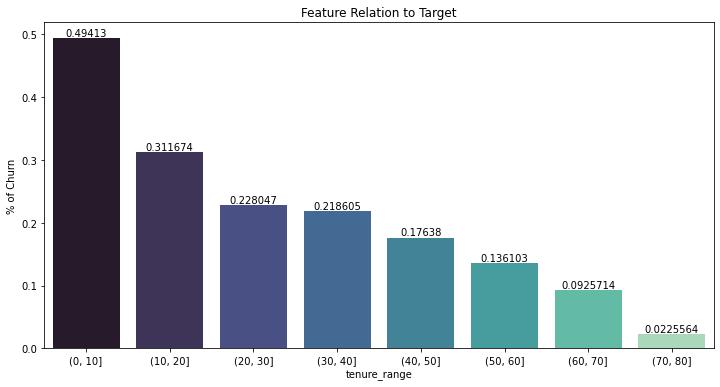

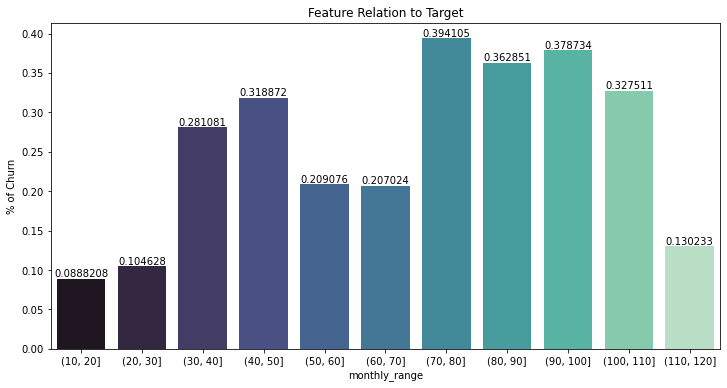

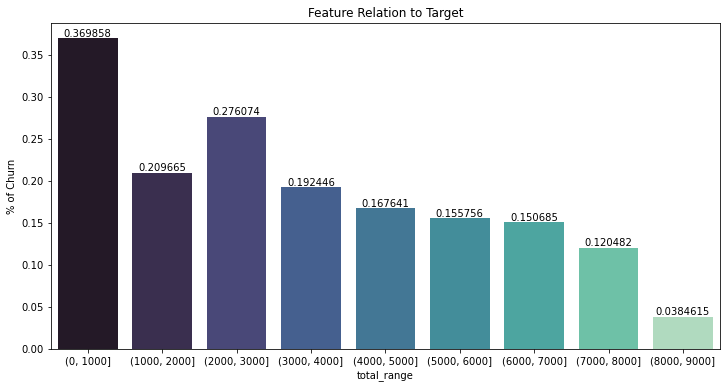

In [20]:
for features in feat_num:
    bar(features)

Untuk kolom numerik, penulis melakukan sedikit perubahan yaitu dengan mengubahnya menjadi beberapa kelompok nilai (interval) agar lebih mudah dalam mengambil informasi dari grafik yang dibuat. Beberapa informasi yang didapatkan dari grafik di atas adalah:
- Semakin lama customer menggunakan layanan/produk kita maka akan semakin kecil juga kemungkinan untuk melakukan churn-nya. Customer yang baru menggunakan layanan/produk kita kurang dari 1 tahun paling tinggi kemungkinannya untuk melakukan churn.
- Customer dengan tagihan bulanan lebih kecil maka kemungkinannya untuk melakukan churn juga lebih kecil. Namun berkebalikan dengan total tagihan, customer dengan total tagihan yang lebih kecil malah kemungkinan churn-nya lebih tinggi. Ini karena total tagihan merupakan cerminan dari lamanya customer menggunakan layanan/produk kita, dimana customer dengan total tagihan yang lebih kecil ini adalah customer yang baru sebentar menggunakan layanan/produk kita.

# **V. DATA PREPROCESSING**

In [21]:
df.loc[:, 'Churn'] = df.loc[:, 'Churn'].replace('No', 0)
df.loc[:, 'Churn'] = df.loc[:, 'Churn'].replace('Yes', 1)

## V.1. Pemisahan Data Inference

In [22]:
data_inf = df.sample(5, random_state=39)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
290,Male,1,No,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,1712.70,1
2445,Female,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,74.40,1972.35,0
6015,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,0
1469,Male,0,No,No,37,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,1
6496,Male,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,1


In [23]:
data_train_test = df.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [24]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## V.2. Pemisahan Data Train, Test, dan Validation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], train_size=0.85, stratify=df['Churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train)

print('Data Train Size:', X_train.shape)
print('Data Test Size :', X_test.shape)
print('Data Validation Size:', X_val.shape)

Data Train Size: (4781, 19)
Data Test Size : (1055, 19)
Data Validation Size: (1196, 19)


## V.3. Handling Outliers

In [26]:
def diagnostic_plots(data, feature):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

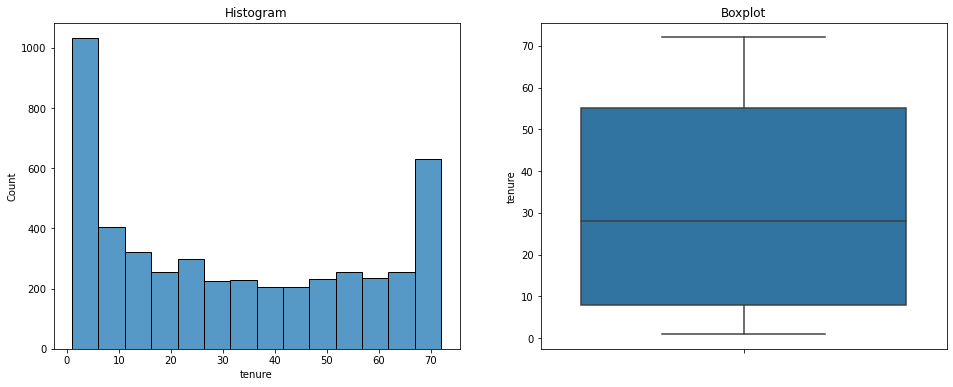

Nilai Skewness: 0.2492986252429378


In [27]:
diagnostic_plots(X_train, 'tenure')
print('Nilai Skewness:', X_train['tenure'].skew())

Untuk kolom tenure distribusi datanya termasuk distribusi normal dan jika melihat dari boxplotnya tidak ditemukan adanya outliers pada kolom ini.

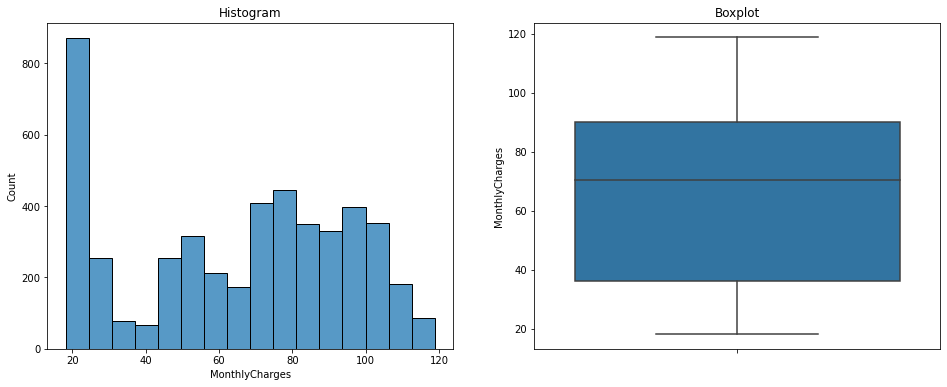

Nilai Skewness: -0.22394161950820818


In [28]:
diagnostic_plots(X_train, 'MonthlyCharges')
print('Nilai Skewness:', X_train['MonthlyCharges'].skew())

Begitu juga untuk kolom MonthlyCharges distribusi datanya juga termasuk distribusi normal dan jika melihat dari boxplotnya tidak ditemukan adanya outliers pada kolom ini.

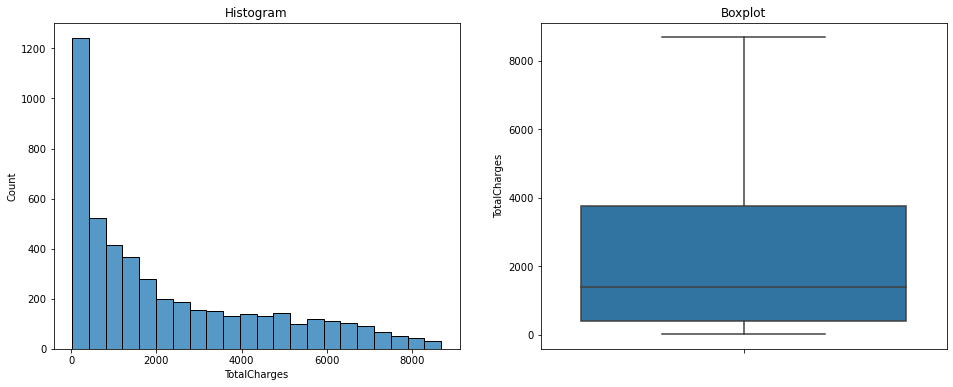

Nilai Skewness: 0.9636686856441116


In [29]:
diagnostic_plots(X_train, 'TotalCharges')
print('Nilai Skewness:', X_train['TotalCharges'].skew())

Untuk kolom TotalCharges distribusi datanya termasuk mild skew dengan nilai skewness kurang dari 1, dan jika melihat dari boxplotnya tidak ditemukan adanya outliers pada kolom ini.

In [30]:
# fungsi untuk mencari batas atas dan bawah untuk outliers

def find_normal_bound(data, feature):
    normal_lower_bound = data[feature].mean() - 3 * data[feature].std()
    normal_upper_bound = data[feature].mean() + 3 * data[feature].std()

    return normal_lower_bound, normal_upper_bound

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    skew_lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    skew_upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return skew_lower_bound, skew_upper_bound

In [31]:
normal_lower_bound, normal_upper_bound = find_normal_bound(X_train, 'tenure')
normal_lower_bound, normal_upper_bound

print('Batas bawah tenure:',normal_lower_bound)
print('Batas atas tenure:',normal_upper_bound)
print('')
print('Outliers bawah tenure : {}'.format(len(X_train[X_train['tenure'] < normal_lower_bound])))
print('Outliers atas tenure : {}'.format(len(X_train[X_train['tenure'] > normal_upper_bound])))

Batas bawah tenure: -41.691796759647154
Batas atas tenure: 105.98378588326145

Outliers bawah tenure : 0
Outliers atas tenure : 0


In [32]:
normal_lower_bound, normal_upper_bound = find_normal_bound(X_train, 'MonthlyCharges')
normal_lower_bound, normal_upper_bound

print('Batas bawah MonthlyCharges:',normal_lower_bound)
print('Batas atas MonthlyCharges:',normal_upper_bound)
print('')
print('Outliers bawah MonthlyCharges : {}'.format(len(X_train[X_train['MonthlyCharges'] < normal_lower_bound])))
print('Outliers atas MonthlyCharges : {}'.format(len(X_train[X_train['MonthlyCharges'] > normal_upper_bound])))

Batas bawah MonthlyCharges: -25.16725282027403
Batas atas MonthlyCharges: 154.97432247097447

Outliers bawah MonthlyCharges : 0
Outliers atas MonthlyCharges : 0


In [33]:
skew_lower_bound, skew_upper_bound = find_skew_bound(X_train, 'TotalCharges', 1.5)
skew_lower_bound, skew_upper_bound

print('Batas bawah TotalCharges:',skew_lower_bound)
print('Batas atas TotalCharges:',skew_upper_bound)
print('')
print('Outliers bawah TotalCharges : {}'.format(len(X_train[X_train['TotalCharges'] < skew_lower_bound])))
print('Outliers atas TotalCharges : {}'.format(len(X_train[X_train['TotalCharges'] > skew_upper_bound])))

Batas bawah TotalCharges: -4687.224999999999
Batas atas TotalCharges: 8840.175

Outliers bawah TotalCharges : 0
Outliers atas TotalCharges : 0


Penulis memastikan lagi dengan menggunakan perhitungan Z-Score dan Tukey's Rule, dan ternyata benar bahwa tidak ditemukan adanya outliers pada ketiga kolom numerik ini.

## V.4. Feature Selection

Pada feature selection kali ini penulis akan menggunakan bantuan perhitungan korelasi dengan metode phik.

Source : `https://arxiv.org/pdf/1811.11440.pdf`

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


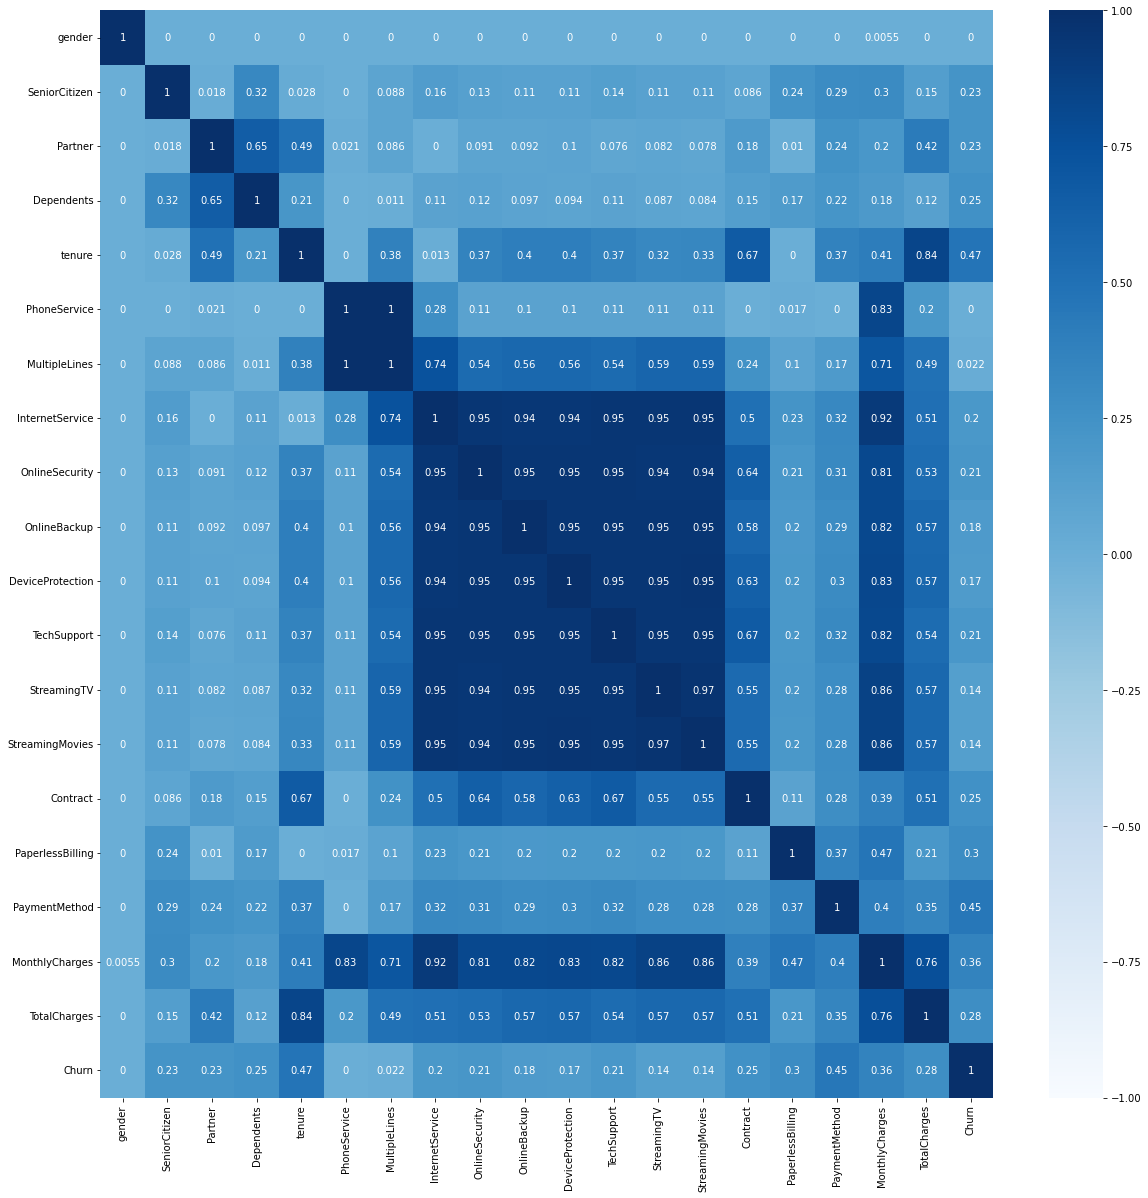

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.phik_matrix(), vmin=-1, vmax=1, annot=True, cmap='Blues');

Melihat dari nilai korelasi antara kolom feature dan target, didapatkan 3 kolom feature yang nilai korelasinya mendekati nol atau bisa dikatakan tidak berkorelasi dengan kolom target yang kita punya. Ketiga kolom tersebut adalah gender, PhoneServices, dan MultipleLines. Namun penulis masih akan melakukan pengecekan lanjutan dengan menghitung nilai signifikansi dari masing-masing kolom feature yang dimiliki.

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


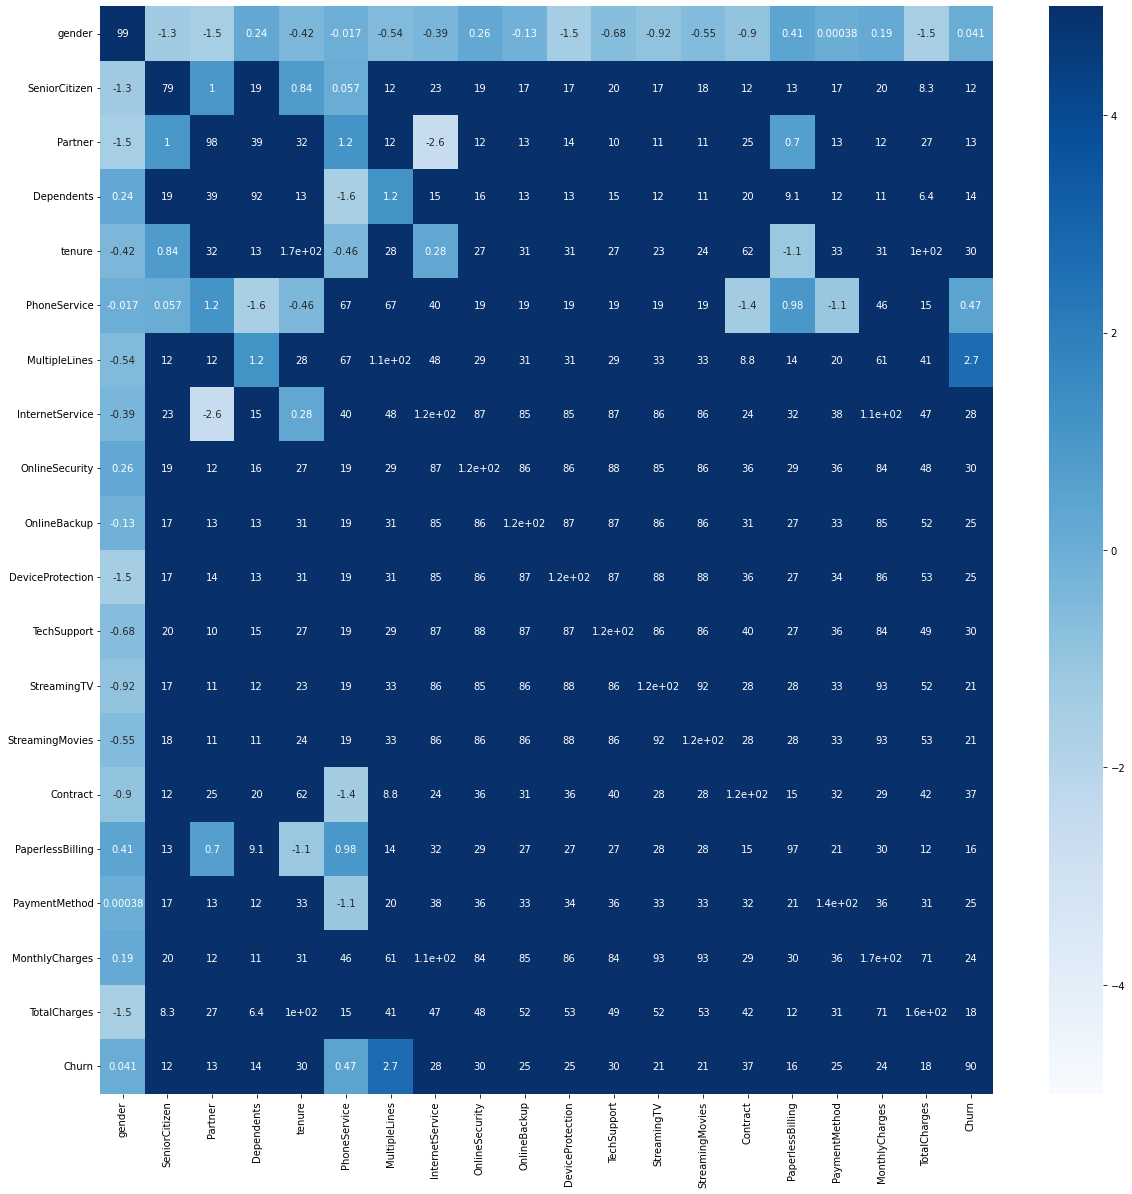

In [35]:
significance = df.significance_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(significance, vmin=-5, vmax=5, annot=True, cmap='Blues');

Untuk nilai signifikansinya kita mengambil treshold atau batasan < -5 dan > 5. Dan ternyata ketiga kolom yang memiliki nilai korelasi rendah di atas juga memiliki nilai signifikansi yang kecil juga. Sehingga penulis memutuskan untuk tidak menggunakan ketiga kolom ini untuk pengolahan data selanjutnya. Kolom yang akan dihapus adalah kolom gender, PhoneService, dan MultipleLines.

In [36]:
X_train.drop(columns=['gender', 'PhoneService', 'MultipleLines'], inplace=True)
X_test.drop(columns=['gender', 'PhoneService', 'MultipleLines'], inplace=True)
X_val.drop(columns=['gender', 'PhoneService', 'MultipleLines'], inplace=True)

X_train

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2793,0,No,No,4,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.10,336.15
4799,0,Yes,Yes,10,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.80,196.75
2261,0,Yes,No,49,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),52.15,2583.75
6961,0,Yes,No,24,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.40,1747.85
4433,0,No,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.65,302.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,0,Yes,Yes,37,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.45,911.60
43,0,No,No,63,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45
3530,0,No,No,17,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.00,1108.00
796,0,No,No,31,Fiber optic,No,No,No,Yes,No,No,One year,No,Credit card (automatic),81.70,2548.65


## V.5. Pemisahan Kolom Numerikal dan Kategorikal

Dilakukan pemisahan kolom berdasarkan tipe kolomnya. Hal ini dilakukan karena tiap jenis kolom akan berbeda perlakuan/treatment yang dilakukan nantinya. Untuk kolom numerikal dilakukan feature scaling dan untuk kolom kategorikal dilakukan feature encoding.

In [37]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

print('Kolom numerikal:', num_columns)
print('Kolom kategorikal:', cat_columns)

Kolom numerikal: ['tenure', 'MonthlyCharges', 'TotalCharges']
Kolom kategorikal: ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [38]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

## V.6. Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini.

In [39]:
X_train_num

,tenure,MonthlyCharges,TotalCharges
2793,4,80.10,336.15
4799,10,19.80,196.75
2261,49,52.15,2583.75
6961,24,75.40,1747.85
4433,4,75.65,302.35
...,...,...,...
4650,37,26.45,911.60
43,63,79.85,4861.45
3530,17,69.00,1108.00
796,31,81.70,2548.65


In [40]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)

X_train_num_scaled

array([[-1.14368014,  0.50620368, -0.85541914],
       [-0.89987704, -1.50242671, -0.91692108],
       [ 0.68484314, -0.42482815,  0.13620036],
       ...,
       [-0.61544008,  0.1364558 , -0.51488634],
       [-0.04656617,  0.55950067,  0.12071458],
       [ 0.88801239, -1.33087702, -0.40161071]])

## V.7. Feature Encoding

Dilakukan untuk kolom/feature dengan tipe kategorikal. Tujuannya untuk mengubah kolom kategorikal ini menjadi numeric karena model yang dibuat hanya bisa membaca data numerik.

In [41]:
X_train_cat

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2793,0,No,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
4799,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic)
2261,0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
6961,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
4433,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
43,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic)
3530,0,No,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check
796,0,No,No,Fiber optic,No,No,No,Yes,No,No,One year,No,Credit card (automatic)


In [42]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = encoder.transform(X_val_cat)

X_train_cat_enc

array([[0., 0., 0., ..., 0., 1., 2.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 3.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.]])

## V.8. Penggabungan Kembali Kolom Numerikal dan Kategorikal

Setelah masing-masing tipe kolom dilakukan treatment sesuai tipe kolomnya, maka selanjutnya kolom-kolom ini digabung kembali menjadi 1 dataframe seperti awal.

In [43]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_enc], axis=1)

X_train_final

array([[-1.14368014,  0.50620368, -0.85541914, ...,  0.        ,
         1.        ,  2.        ],
       [-0.89987704, -1.50242671, -0.91692108, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68484314, -0.42482815,  0.13620036, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.61544008,  0.1364558 , -0.51488634, ...,  0.        ,
         1.        ,  3.        ],
       [-0.04656617,  0.55950067,  0.12071458, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.88801239, -1.33087702, -0.40161071, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.143680,0.506204,-0.855419,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.899877,-1.502427,-0.916921,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.684843,-0.424828,0.136200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.331003,0.349644,-0.232591,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.143680,0.357971,-0.870331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,0.197237,-1.280911,-0.601536,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0
4777,1.253717,0.497876,1.141100,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0
4778,-0.615440,0.136456,-0.514886,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0
4779,-0.046566,0.559501,0.120715,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0


## V.9. Handling Imbalance

In [45]:
smotenc = SMOTENC([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], random_state = 39)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

0    3510
1    3510
Name: Churn, dtype: int64

In [46]:
X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_train_balanced_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.143680,0.506204,-0.855419,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.899877,-1.502427,-0.916921,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.684843,-0.424828,0.136200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.331003,0.349644,-0.232591,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.143680,0.357971,-0.870331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,-1.212311,0.801829,-0.914921,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0
7016,0.661157,-0.439889,0.085051,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0
7017,-1.265582,0.166364,-0.972887,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
7018,-0.772208,-1.509739,-0.894969,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0


# **VI. MODELLING**

In [152]:
# tensorflow pipeline

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_balanced))
train_dataset = train_dataset.shuffle(buffer_size = 2000).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(64)

## VI.1. MODEL SEQUENTIAL

### VI.1.a. Base Model

In [175]:
n_neuronseqbase = (16) # jumlah neuron sesuai jumlah feature

# Arsitektur Model Sequential
n_feature = X_train.shape[1]
model_seqbase = Sequential()
model_seqbase.add(Input(shape=(n_feature, )))                   # Input Layer                  
model_seqbase.add(Dense(n_neuronseqbase, activation='relu'))    # Hidden Layer
model_seqbase.add(Dense(1, activation='sigmoid'))               # Output Layer

In [176]:
model_seqbase.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 16)                272       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [177]:
model_seqbase.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')
history_seqbase = model_seqbase.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
110/110 [==============================] - 5s 6ms/step - loss: 0.8062 - accuracy: 0.5308 - val_loss: 0.7092 - val_accuracy: 0.5209
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7083 - val_loss: 0.6273 - val_accuracy: 0.6605
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7480 - val_loss: 0.6075 - val_accuracy: 0.6773
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7560 - val_loss: 0.6105 - val_accuracy: 0.6773
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7575 - val_loss: 0.5948 - val_accuracy: 0.6881
Epoch 6/100
110/110 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7651 - val_loss: 0.5918 - val_accuracy: 0.6915
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4838 - accuracy: 0.7671 - val_loss: 0.5862 - val_accuracy: 0.6906

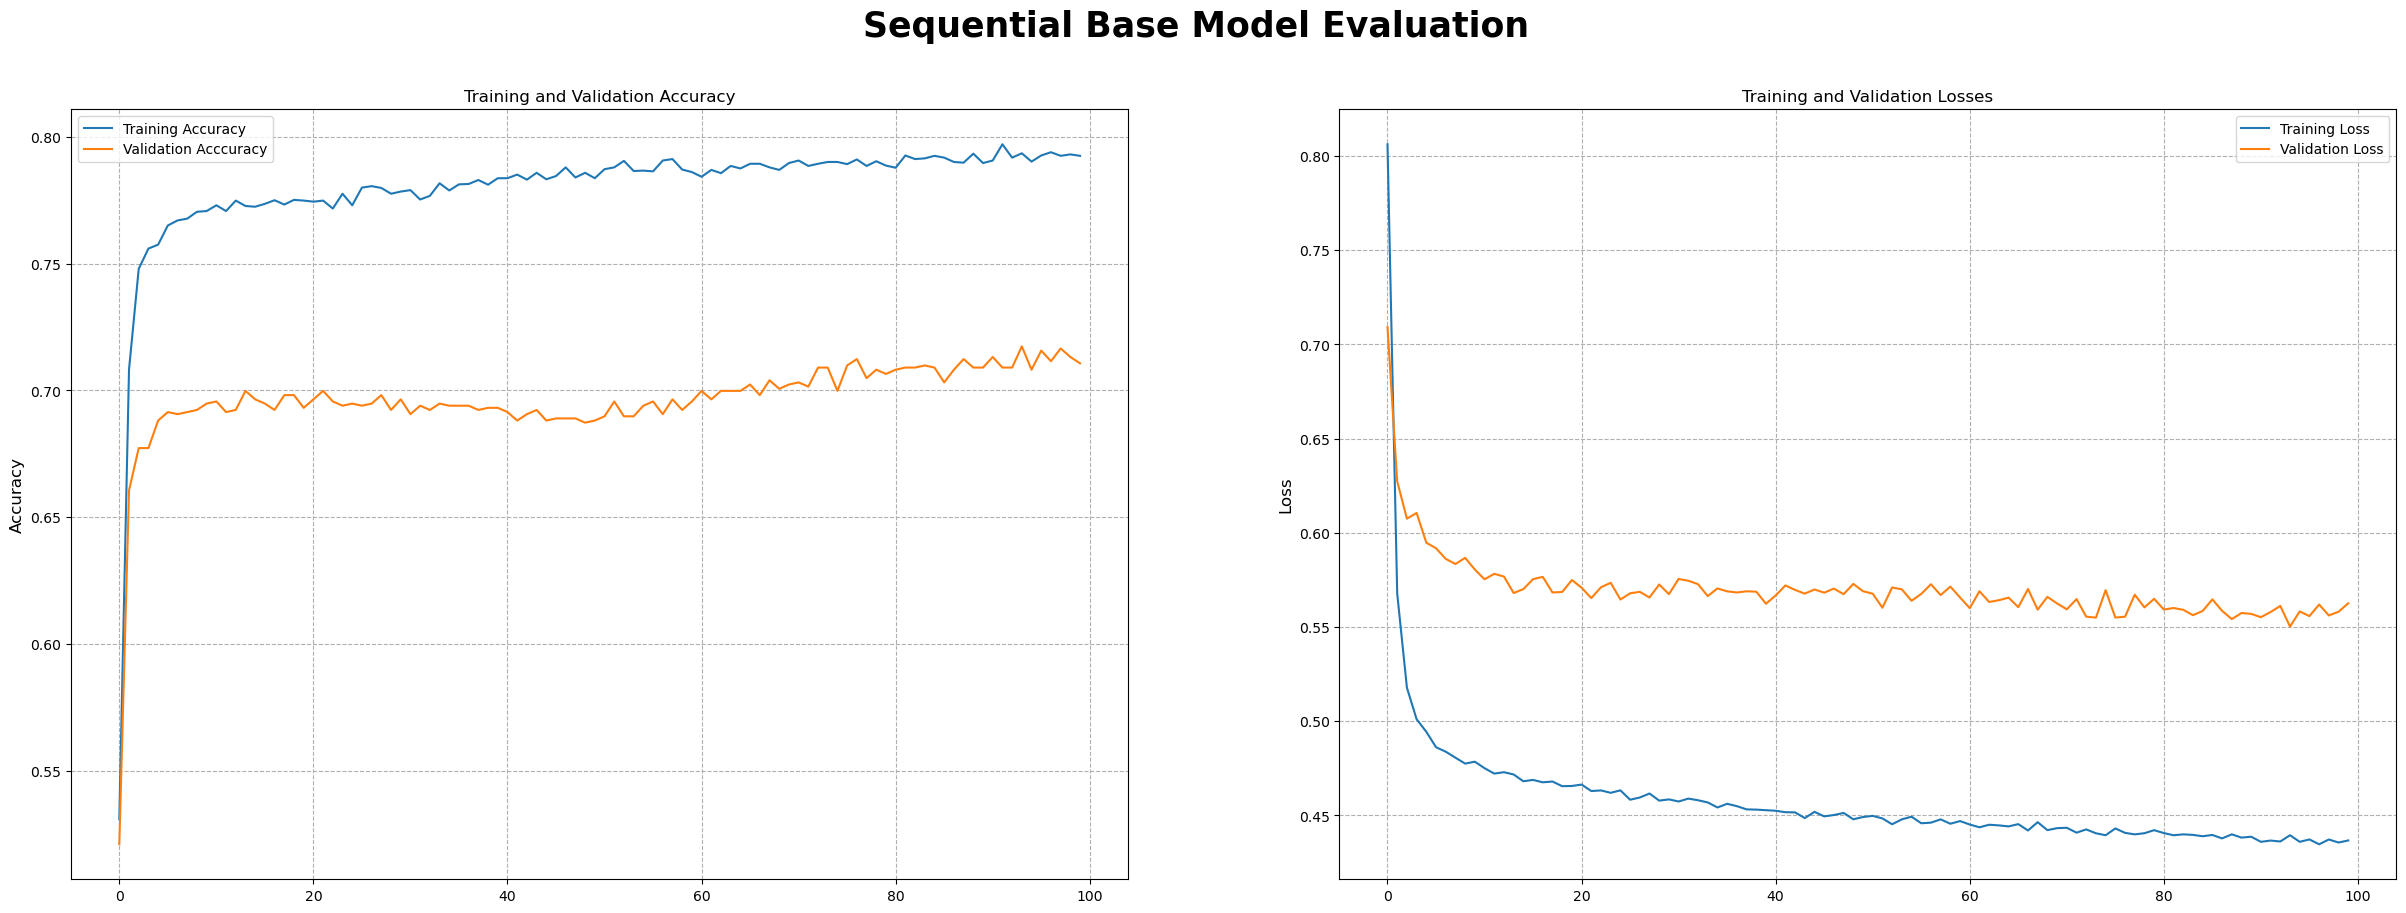

In [191]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Base Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seqbase.history['accuracy'],label="Training Accuracy")
plt.plot(history_seqbase.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seqbase.history['loss'], label="Training Loss")
plt.plot(history_seqbase.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Berikut adalah hasil training dari base model ANN Sequential, dimana masih belum dilakukan hyperparameter tuning. Disini penulis hanya menggunakan 1 hidden layer dengan jumlah neuron 16 sesuai dengan feature yang digunakan, activation pada hidden layernya menggunakan Relu, dan optimizernya menggunakan Adam dengan epochs sebanyak 100. Dapat terlihat dari grafik evaluasi antara data train dan data validation, dimana masih ada gap yang sangat besar diantara kedua data ini. Performa data train jauh lebih besar daripada performa data validationnya, atau bisa dikatakan model masih cenderung overfit. Oleh karena itu akan dilakukan model improvement untuk memperbaiki performa dari model ANN Sequential ini.

### VI.1.b. Model Improvement

In [153]:
n_neuronseq = (16, 8) # jumlah neuron di hidden layer adalah 16 dan 8

# Arsitektur Model Sequential
n_feature = X_train.shape[1]
model_seq = Sequential()
model_seq.add(Input(shape=(n_feature, )))       # Input Layer

for n in n_neuronseq:                           # Hidden Layer
    model_seq.add(Dense(n, activation='elu'))

model_seq.add(Dense(1, activation='sigmoid'))   # Output Layer

In [154]:
model_seq.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 16)                272       
                                                                 
 dense_55 (Dense)            (None, 8)                 136       
                                                                 
 dense_56 (Dense)            (None, 1)                 9         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_seq.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
history_seq = model_seq.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
110/110 [==============================] - 2s 6ms/step - loss: 0.8207 - accuracy: 0.4796 - val_loss: 0.7329 - val_accuracy: 0.5084
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.5013 - val_loss: 0.7145 - val_accuracy: 0.5368
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.7283 - accuracy: 0.5365 - val_loss: 0.6977 - val_accuracy: 0.5627
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5798 - val_loss: 0.6804 - val_accuracy: 0.5911
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6127 - val_loss: 0.6634 - val_accuracy: 0.6154
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6389 - val_loss: 0.6467 - val_accuracy: 0.6321
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6651 - val_loss: 0.6309 - val_accuracy: 0.6538

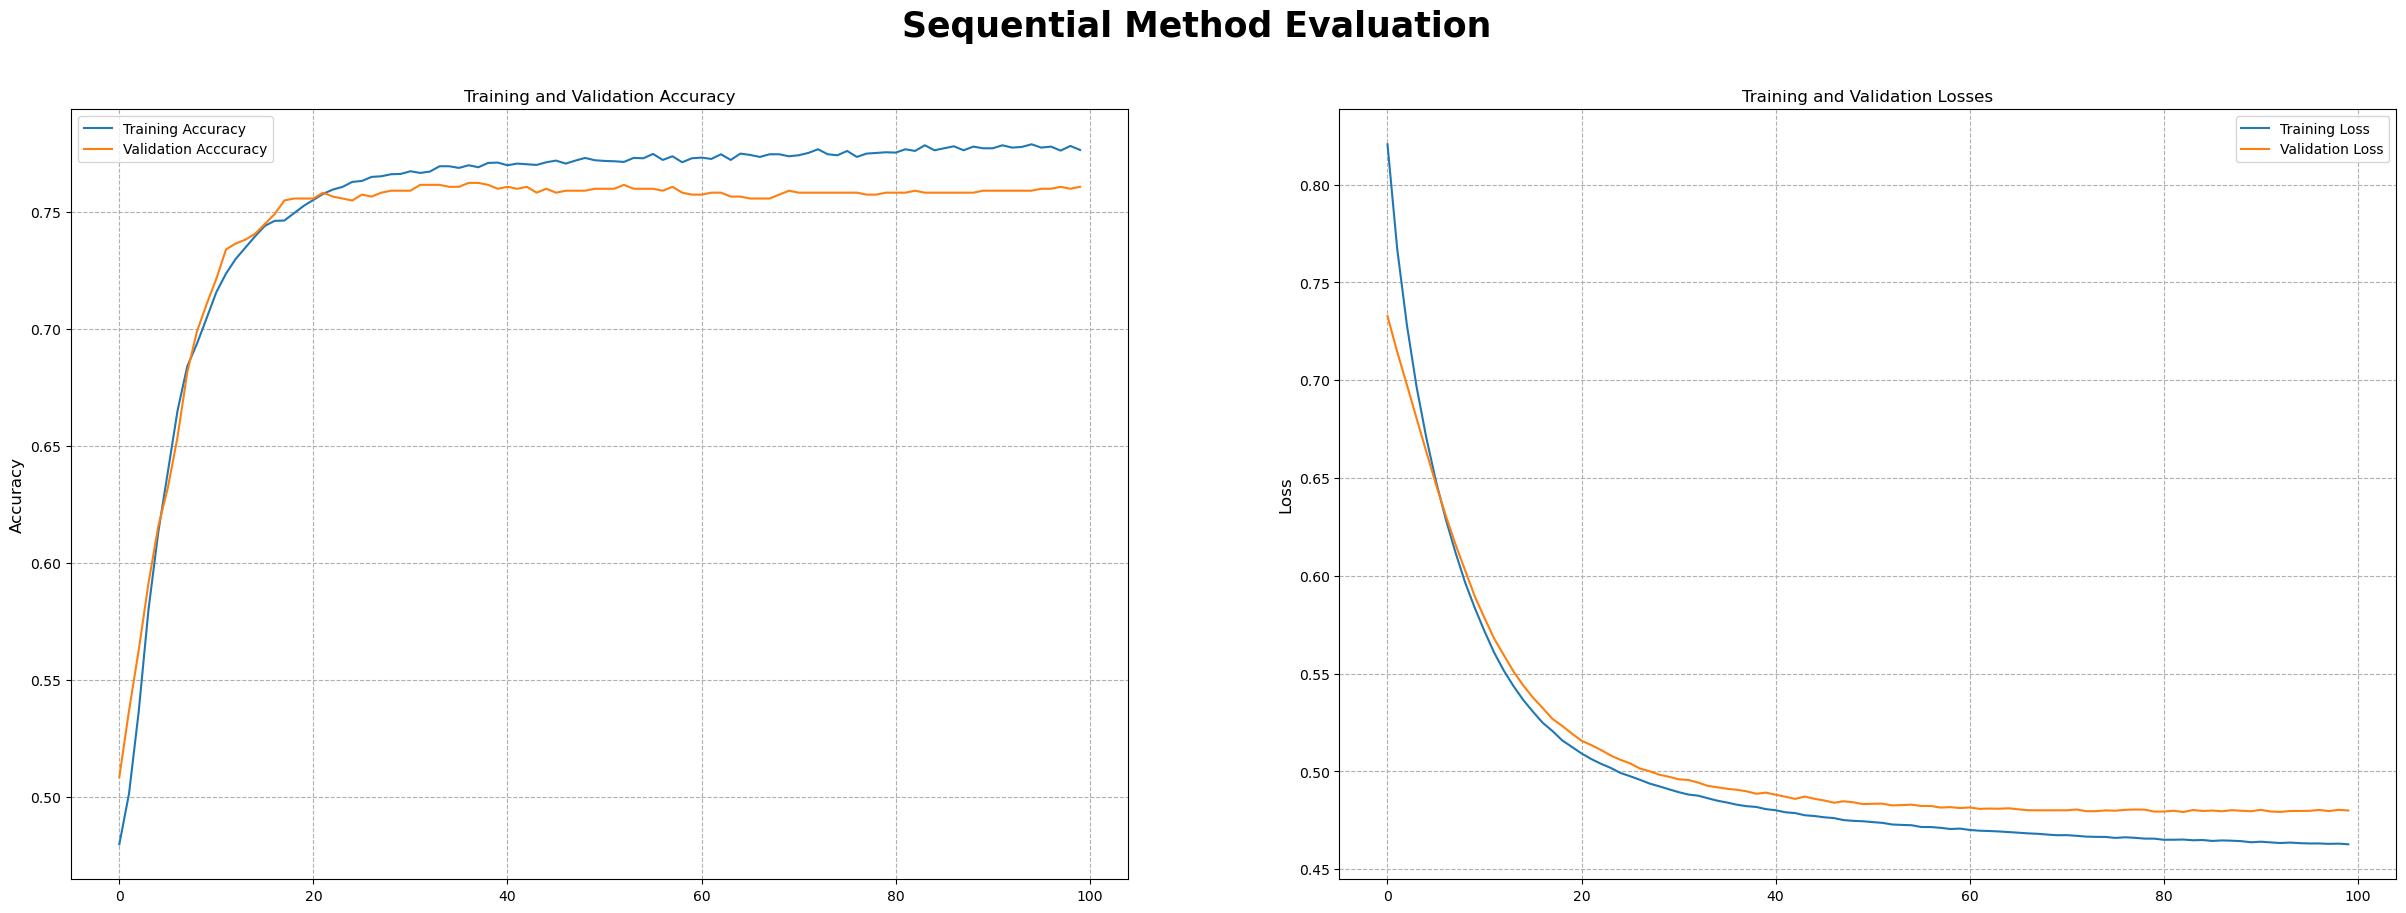

In [156]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Setelah dilakukan model improvement dapat terlihat adanya perbaikan performa dari model ANN Sequential ini. Disini penulis menggunakan 2 hidden layer dengan neuron sebanyak 16 dan 8, activationnya diganti menggunakan Elu, dan optimizernya masih sama menggunakan Adam namun learning ratenya dibuat lebih kecil. Dapat terlihat dari grafik evaluasi antara data train dan data evaluasinya, gap antara kedua data ini sudah semakin mengecil atau bisa dikatakan model yang sebelumnya cenderung overfit sekarang sudah menjadi model yang fit. Menurut penulis model ANN Sequential ini sudah cukup baik untuk digunakan pada data test.

In [263]:
# model freeze
model_seq.trainable = False

### VI.1.c. Model Evaluation

17/17 [==============================] - 0s 6ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       775
           1       0.49      0.86      0.63       280

    accuracy                           0.73      1055
   macro avg       0.71      0.77      0.71      1055
weighted avg       0.82      0.73      0.74      1055



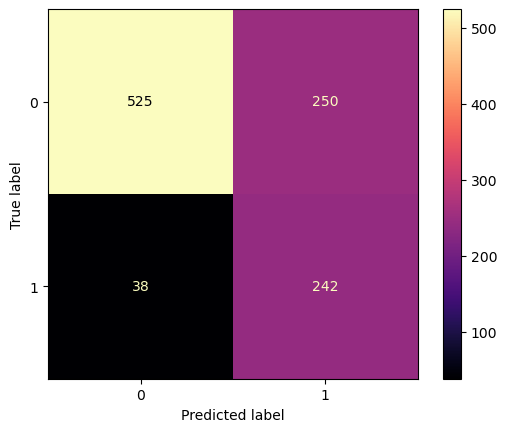

In [310]:
# predict probabilities
y_pred_seq = model_seq.predict(test_dataset)
y_pred_seq = (y_pred_seq > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_seq, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

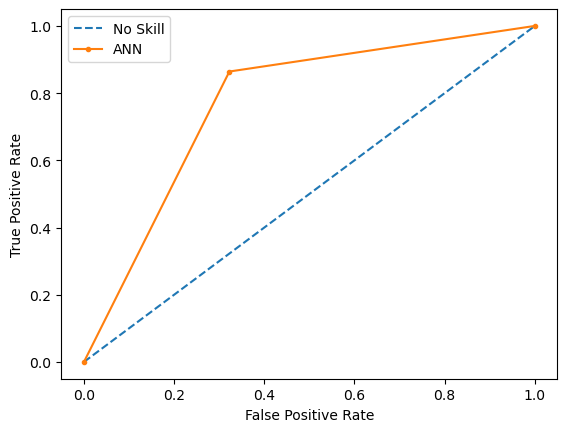

AUC score: 0.7708525345622121


In [314]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq)
auc = roc_auc_score(y_test, y_pred_seq)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Berikut adalah hasil evaluasi model ANN Sequential pada data Test. Disini penulis akan lebih berfokus untuk mengurangi False Negatives atau customer yang akan churn namun diprediksi tidak churn. Menurut penulis, false negatives disini akan lebih berdampak kepada perusahaan karena perusahaan akan kehilangan customer begitu saja tanpa ada usaha untuk me-retain customer tersebut. Jadi disini penulis memilih treshold lebih kecil yaitu di 0.4. Secara nilai accuracy memang menjadi lebih kecil hanya di 0.73, namun dapat terlihat false negative yang muncul juga semakin berkurang tercermin dari nilai recall label 1 yang sebesar 0.86. Kemudian dari nilai AUC yang didapatkan oleh model ANN Sequential ini sebesar 0.77 dimana menurut penulis sudah cukup baik performanya.

## VI.2. MODEL FUNCTIONAL

### VI.2.a. Base Model

In [266]:
n_neuronfuncbase = (16)   # jumlah neuron di hidden layer sesuai dengan jumlah feature

# Arsitektur Model Functional
data_in = Input(shape=(n_feature, ))                            # Input Layer
                     
hidden_n = Dense(n_neuronfuncbase, activation='relu')(data_in) # Hidden Layer

data_out = Dense(1, activation='sigmoid')(hidden_n)             # Output Layer

model_funcbase = Model(inputs=data_in, outputs=data_out)

In [267]:
model_funcbase.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_93 (Dense)            (None, 16)                272       
                                                                 
 dense_94 (Dense)            (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [268]:
model_funcbase.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')
history_funcbase = model_funcbase.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
110/110 [==============================] - 2s 6ms/step - loss: 0.6747 - accuracy: 0.5836 - val_loss: 0.6383 - val_accuracy: 0.6463
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.7350 - val_loss: 0.5870 - val_accuracy: 0.6697
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.5101 - accuracy: 0.7584 - val_loss: 0.5809 - val_accuracy: 0.6739
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7617 - val_loss: 0.5795 - val_accuracy: 0.6806
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7604 - val_loss: 0.5673 - val_accuracy: 0.6948
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7658 - val_loss: 0.5629 - val_accuracy: 0.7032
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7632 - val_loss: 0.5623 - val_accuracy: 0.7040

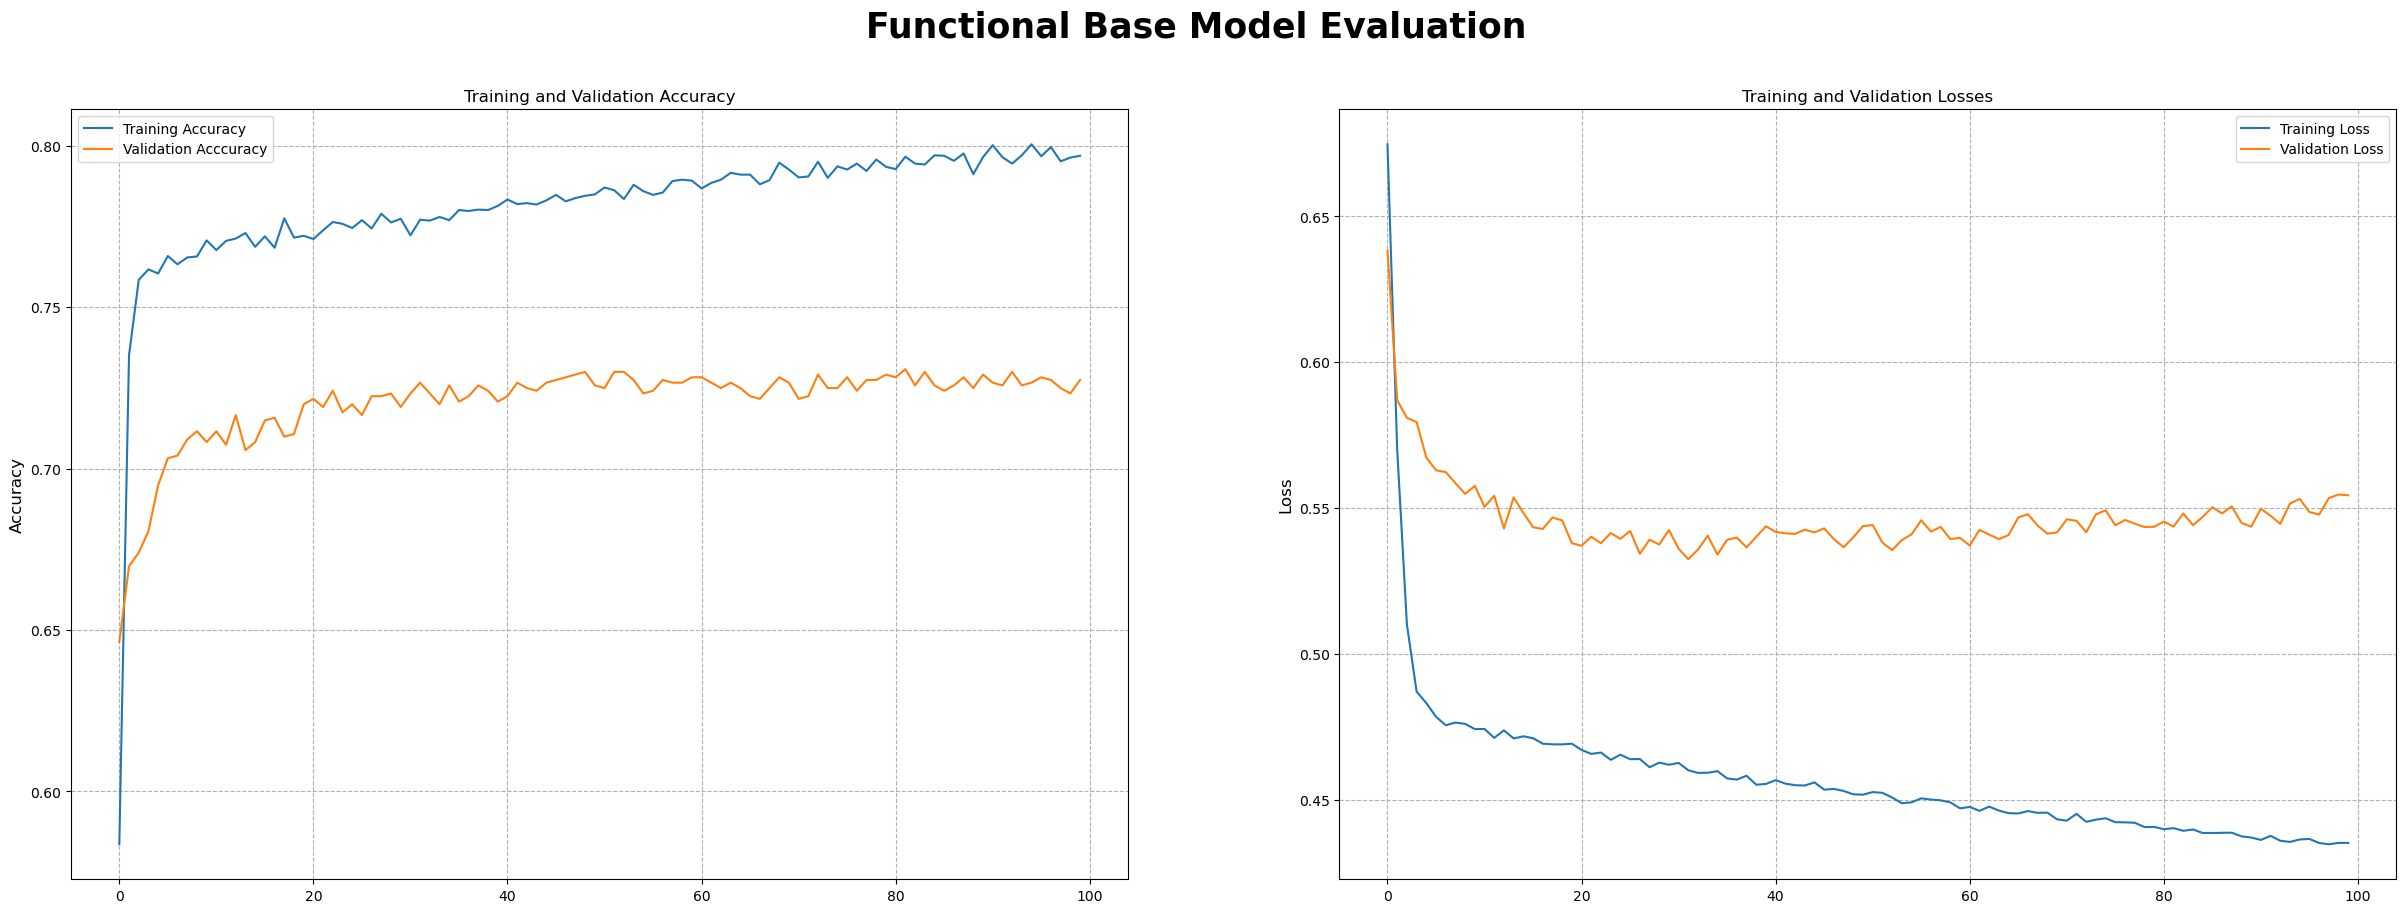

In [269]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Base Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_funcbase.history['accuracy'],label="Training Accuracy")
plt.plot(history_funcbase.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_funcbase.history['loss'], label="Training Loss")
plt.plot(history_funcbase.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Berikut adalah hasil training dari base model ANN Functional, dimana masih belum dilakukan hyperparameter tuning. Disini penulis juga hanya menggunakan 1 hidden layer dengan jumlah neuron 16 sesuai dengan feature yang digunakan, activation pada hidden layernya juga menggunakan Relu, dan optimizernya masih sama menggunakan Adam dengan epochs sebanyak 100. Dapat terlihat dari grafik evaluasi antara data train dan data validation, dimana masih ditemukan gap yang sangat besar diantara kedua data ini. Performa data train jauh lebih besar daripada performa data validationnya, atau bisa dikatakan model masih cenderung overfit. Oleh karena itu akan dilakukan model improvement untuk memperbaiki performa dari model ANN Functional ini.

### VI.2.b. Model Improvement

In [270]:
n_neuronfunc = (16, 8)   # jumlah neuron di hidden layer adalah 16 dan 8

# Arsitektur Model_Functional
data_in = Input(shape=(n_feature, ))                # Input Layer

hidden_n = data_in
for n in n_neuronfunc:                              # Hidden Layer
    hidden_n = Dense(n, activation='elu')(hidden_n)

data_out = Dense(1, activation='sigmoid')(hidden_n) # Output Layer

model_func = Model(inputs=data_in, outputs=data_out)

In [271]:
model_func.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_95 (Dense)            (None, 16)                272       
                                                                 
 dense_96 (Dense)            (None, 8)                 136       
                                                                 
 dense_97 (Dense)            (None, 1)                 9         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [272]:
model_func.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
history_func = model_func.fit(train_dataset, epochs=100, validation_data=(val_dataset))

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 1.0923 - accuracy: 0.3637 - val_loss: 0.9562 - val_accuracy: 0.4482
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.9622 - accuracy: 0.3848 - val_loss: 0.8457 - val_accuracy: 0.4707
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.4140 - val_loss: 0.7562 - val_accuracy: 0.5033
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.7770 - accuracy: 0.4476 - val_loss: 0.6872 - val_accuracy: 0.5535
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.4993 - val_loss: 0.6364 - val_accuracy: 0.6162
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5651 - val_loss: 0.5976 - val_accuracy: 0.6639
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6288 - val_loss: 0.5698 - val_accuracy: 0.7040

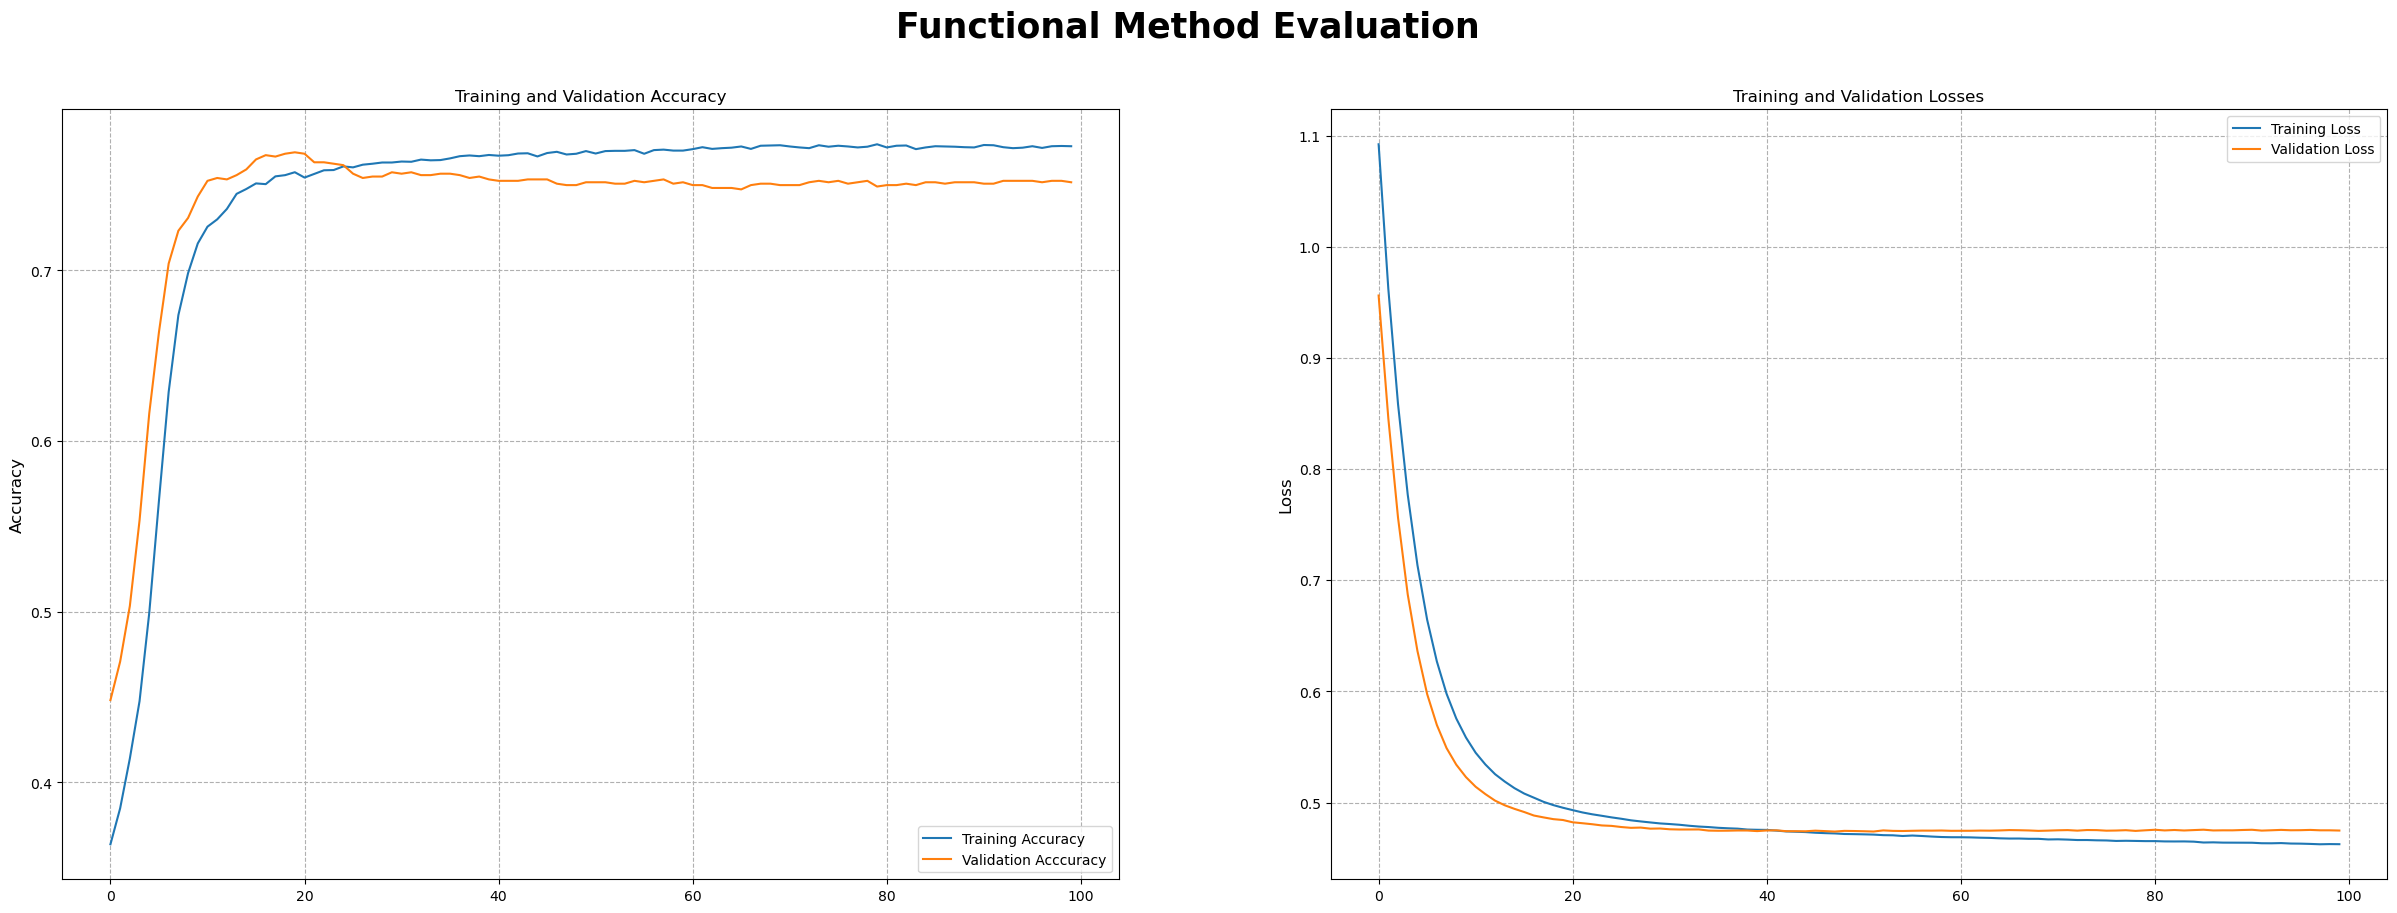

In [273]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_func.history['accuracy'],label="Training Accuracy")
plt.plot(history_func.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func.history['loss'], label="Training Loss")
plt.plot(history_func.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Setelah dilakukan model improvement dapat terlihat adanya perbaikan performa dari model ANN Functional ini. Disini penulis menggunakan 2 hidden layer dengan neuron sebanyak 16 dan 8, activationnya diganti menggunakan Elu, dan optimizernya masih sama menggunakan Adam namun learning ratenya dibuat lebih kecil. Dapat terlihat dari grafik evaluasi antara data train dan data evaluasinya, gap antara kedua data ini sudah semakin mengecil atau bisa dikatakan model yang sebelumnya cenderung overfit sekarang sudah menjadi model yang fit. Menurut penulis model ANN Functional ini juga sudah cukup baik untuk digunakan pada data test.

In [274]:
# model freeze
model_func.trainable = False

### VI.2.c. Model Evaluation

17/17 [==============================] - 0s 5ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       775
           1       0.48      0.86      0.62       280

    accuracy                           0.71      1055
   macro avg       0.70      0.76      0.69      1055
weighted avg       0.81      0.71      0.73      1055



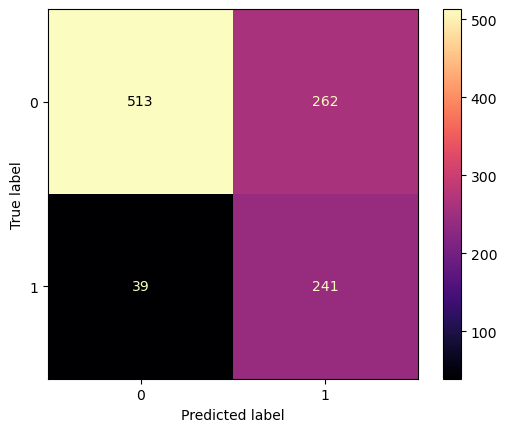

In [315]:
# predict probabilities
y_pred_func = model_func.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

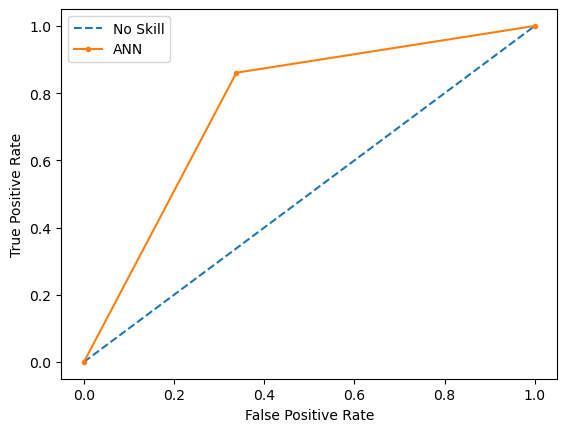

AUC score: 0.7613248847926267


In [316]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Berikut adalah hasil evaluasi model ANN Functional pada data Test. Disini penulis akan lebih berfokus untuk mengurangi False Negatives atau customer yang akan churn namun diprediksi tidak churn. Menurut penulis, false negatives disini akan lebih berdampak kepada perusahaan karena perusahaan akan kehilangan customer begitu saja tanpa ada usaha untuk me-retain customer tersebut. Jadi disini penulis memilih treshold lebih kecil yaitu di 0.4. Secara nilai accuracy memang menjadi lebih kecil hanya di 0.71, namun dapat terlihat false negative yang muncul juga semakin berkurang tercermin dari nilai recall label 1 yang sebesar 0.86. Kemudian dari nilai AUC yang didapatkan oleh model ANN Sequential ini sebesar 0.76 dimana menurut penulis sudah cukup baik performanya.

Dan ini adalah hasil perbandingan performa antara model ANN Sequential dan Functional:

| Model             | Accuracy  | Recall 1  | AUC Score |
|  :---             |  :----:   |    :----: |   :----:  |
| ANN Sequential    | 0.73      | 0.86      | 0.77      |
| ANN Functional    | 0.71      | 0.86      | 0.76      |

Dari tabel diatas dapat terlihat bahwa metric-metric pada model ANN Sequential lebih baik dibandingkan Functional, terutama pada nilai accuracy dan AUC score-nya. Penulis memilih model ANN Sequential sebagai model terbaik yang didapatkan dari analisis kali ini. Maka untuk proses model inference sampai deployment nanti, model yang digunakan oleh penulis adalah model ANN Sequential

# **VII. MODEL SAVING**

In [280]:
model_seq.save('churn_model')

INFO:tensorflow:Assets written to: churn_model\assets


In [281]:
model_seq.save('churn_model.h5')

# **VIII. MODEL INFERENCE**

Pada section ini akan dicoba untuk model memprediksi data inference atau data baru yang belum pernah dilihat sebelumnya.

In [401]:
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,No,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,1712.70,1
1,Female,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,74.40,1972.35,0
2,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,0
3,Male,0,No,No,37,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,1
4,Male,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,1


In [402]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['SeniorCitizen', 'PaymentMethod', 'PaperlessBilling', 'Contract', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

num_pipe = Pipeline([
    ('scaling', scaler)
])

cat_pipe = Pipeline([
    ('encoding', encoder)
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])

preprocess.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder())]),
                                 ['SeniorCitizen', 'PaymentMethod',
                                  'PaperlessBilling', 'Contract', 'Partner',
                                  'Dependents', 'TechSupport', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'StreamingTV',
                                  'StreamingMovies'])])

In [403]:
# saving preprocess pipeline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

In [404]:
data_inf_final = preprocess.transform(data_inf)

In [405]:
pred_inf = model_seq.predict(data_inf_final)
pred_inf_df = pd.DataFrame(np.round_(pred_inf), columns=['Predicted Churn'], dtype='float64')
pred_inf_df

1/1 [==============================] - 0s 75ms/step


,Predicted Churn
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [406]:
data_pred_inf_final = pd.concat([data_inf, pred_inf_df], axis=1)
data_pred_inf_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predicted Churn
0,Male,1,No,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,1712.70,1,0.0
1,Female,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,74.40,1972.35,0,0.0
2,Female,0,No,No,3,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,0,0.0
3,Male,0,No,No,37,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),98.80,3475.55,1,1.0
4,Male,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,1,1.0


# **IX. CONCLUSIONS**

Telah berhasil dibuat dua buah model ANN yaitu Sequential dan Functional yang bertujuan untuk membantu perusahaan melakukan prediksi customer mana yang akan melakukan churn. Penulis menggunakan tiga buah metric evaluasi untuk acuan performa model yang dibuat, yaitu Accuracy, Recall label 1, dan AUC Score. Nilai accuracy dan AUC score disini sebagai gambaran umum performa model dalam melakukan prediksi, dan nilai recall label 1 sebagai acuan error false negative yang didapatkan, false negative disini adalah model salah memprediksi customer churn dianggap sebagai customer tidak churn. Kesalahan dalam prediksi tersebut akan merugikan perusahaan karena perusahaan akan kehilangan customer begitu saja tanpa sempat melakukan usaha untuk me-retain customer tersebut, terlebih seperti yang diketahui bahwa cost untuk akuisisi customer baru jauh lebih tinggi daripada cost untuk me-retain customer yang sudah ada. Jadi disini penulis ingin meminimalisir kesalahan false negative ini.

Dan berikut adalah metric evaluasi dari kedua model yang sudah dibuat:

| Model             | Accuracy  | Recall 1  | AUC Score |
|  :---             |  :----:   |    :----: |   :----:  |
| ANN Sequential    | 0.73      | 0.86      | 0.77      |
| ANN Functional    | 0.71      | 0.86      | 0.76      |

Berdasarkan metric evaluasinya, model terbaik dalam prediksi customer churn kali ini adalah model ANN Sequential melihat dari nilai accuracy dan AUC score yang lebih besar dibandingkan ANN Functional. Secara umum performa model sudah cukup baik berdasarkan nilai accuracy dan AUC score-nya. Dan kesalahan false negative berhasil diminimalisir karena nilai recall label 1 yang didapatkan sudah baik yaitu di 0.86, atau dengan kata lain:
- Dari seluruh customer yang akan churn, model ANN Sequential berhasil memprediksi dengan tepat untuk 86% customer. Dan hanya 14% customer churn yang diprediksi sebagai customer tidak churn.